#Requisito 01

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import networkx as nx

# Definir o caminho dos arquivos .graphml
caminhos = [
    '/content/drive/MyDrive/Estrutura de Dados II/week 08-09/seeds/seed01.graphml',
    '/content/drive/MyDrive/Estrutura de Dados II/week 08-09/seeds/seed02.graphml',
    '/content/drive/MyDrive/Estrutura de Dados II/week 08-09/seeds/seed03.graphml'
]

# Carregar e fundir os grafos
grafos = [nx.read_graphml(caminho) for caminho in caminhos]
G_combined = nx.compose_all(grafos)

# Salvar o grafo fundido em um novo arquivo .graphml
nx.write_graphml(G_combined, 'rede.graphml')

In [3]:
len(G_combined.edges), len(G_combined.nodes)

(31740, 9423)

#Requisito 02



```
# Isto está formatado como código
```

## Degree Centraliy

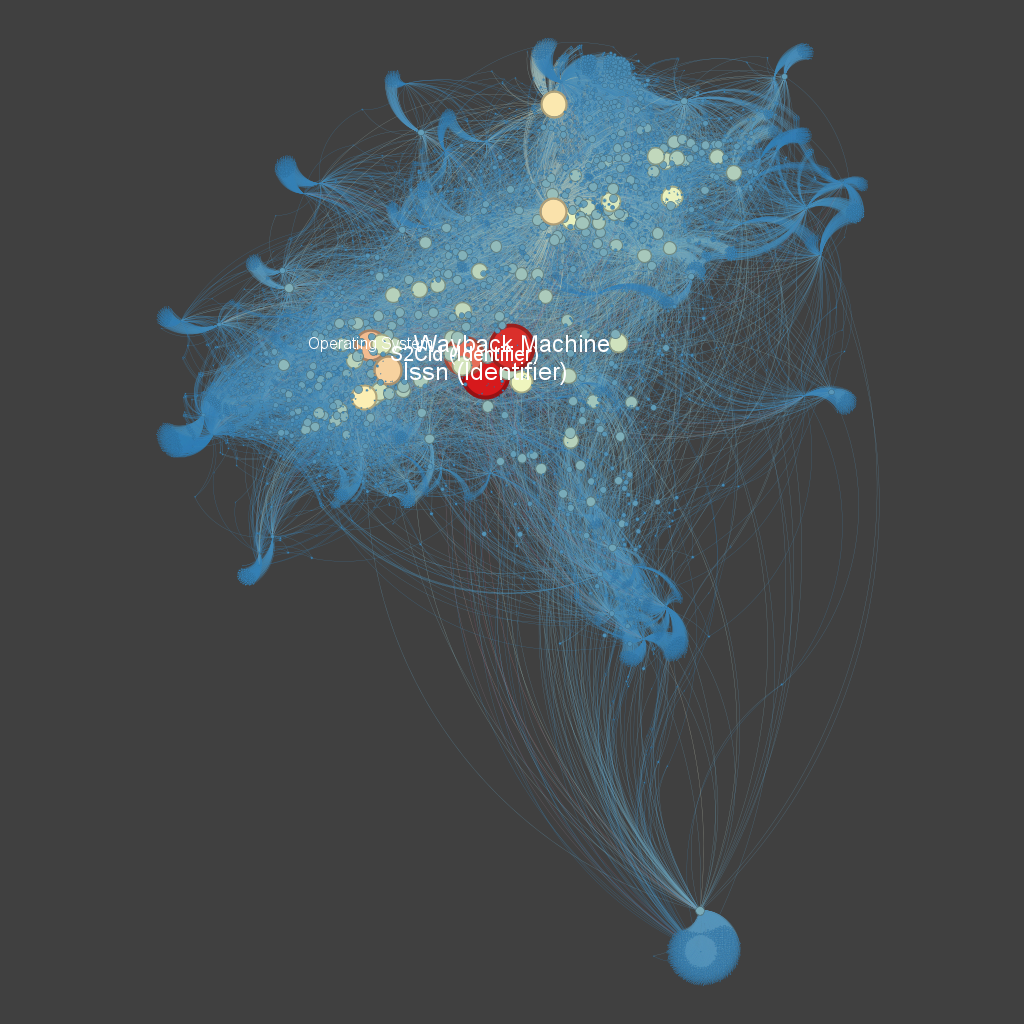

## Closeness Centraliy

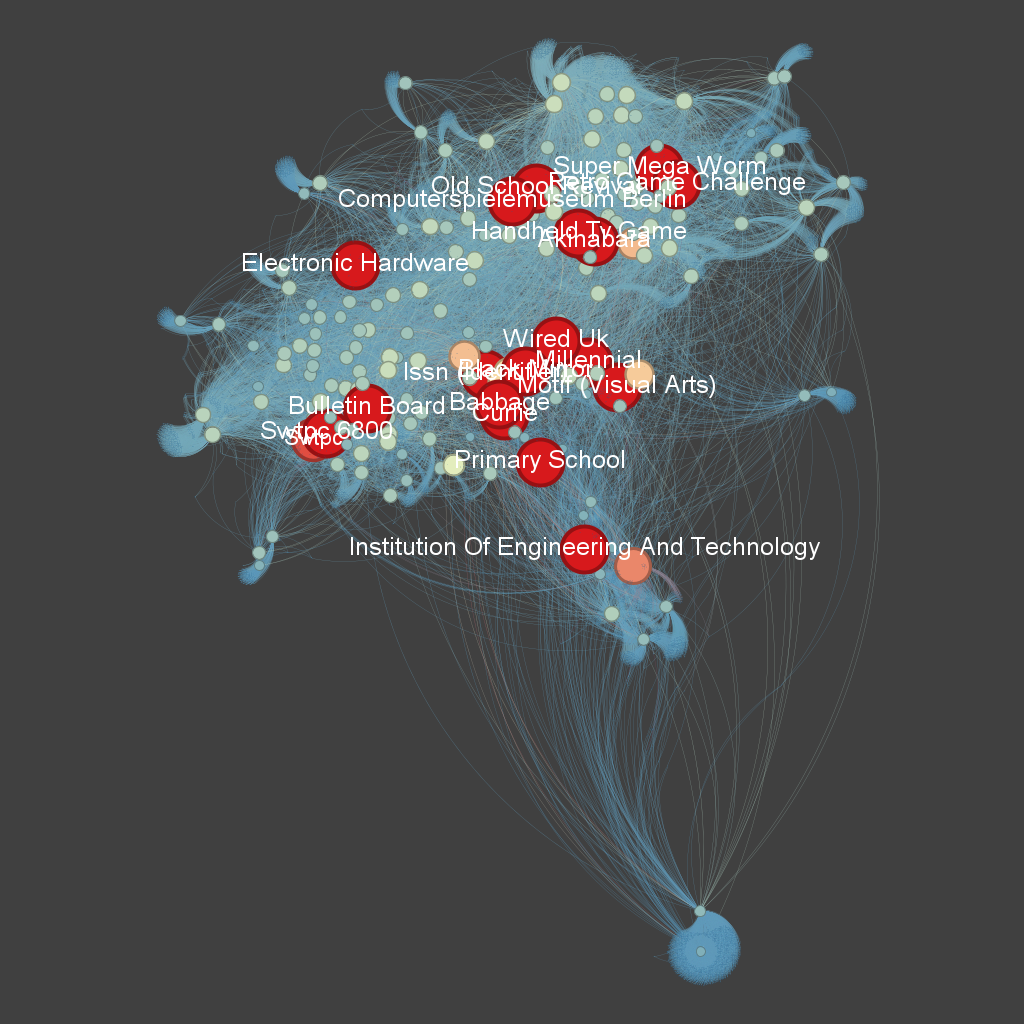

## Betweenness Centraliy

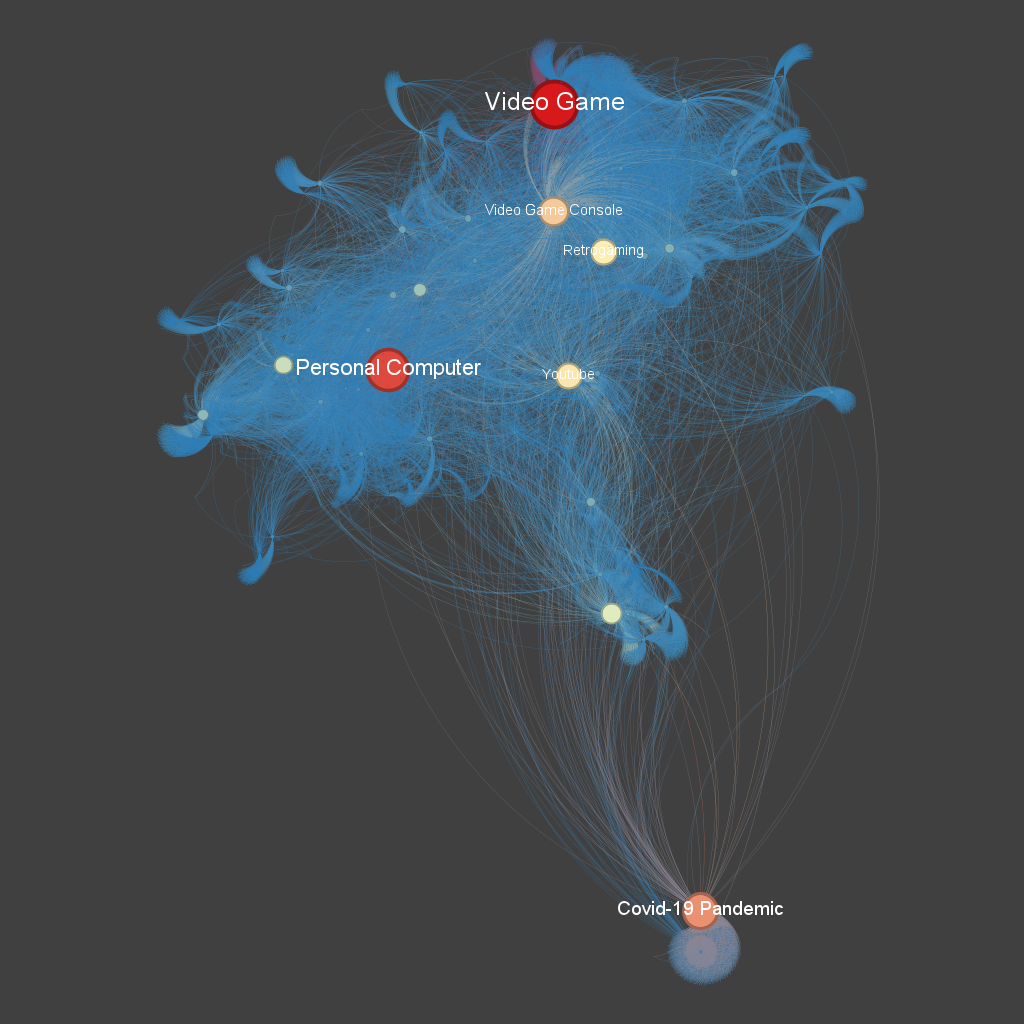

## Eigenvector Centraliy

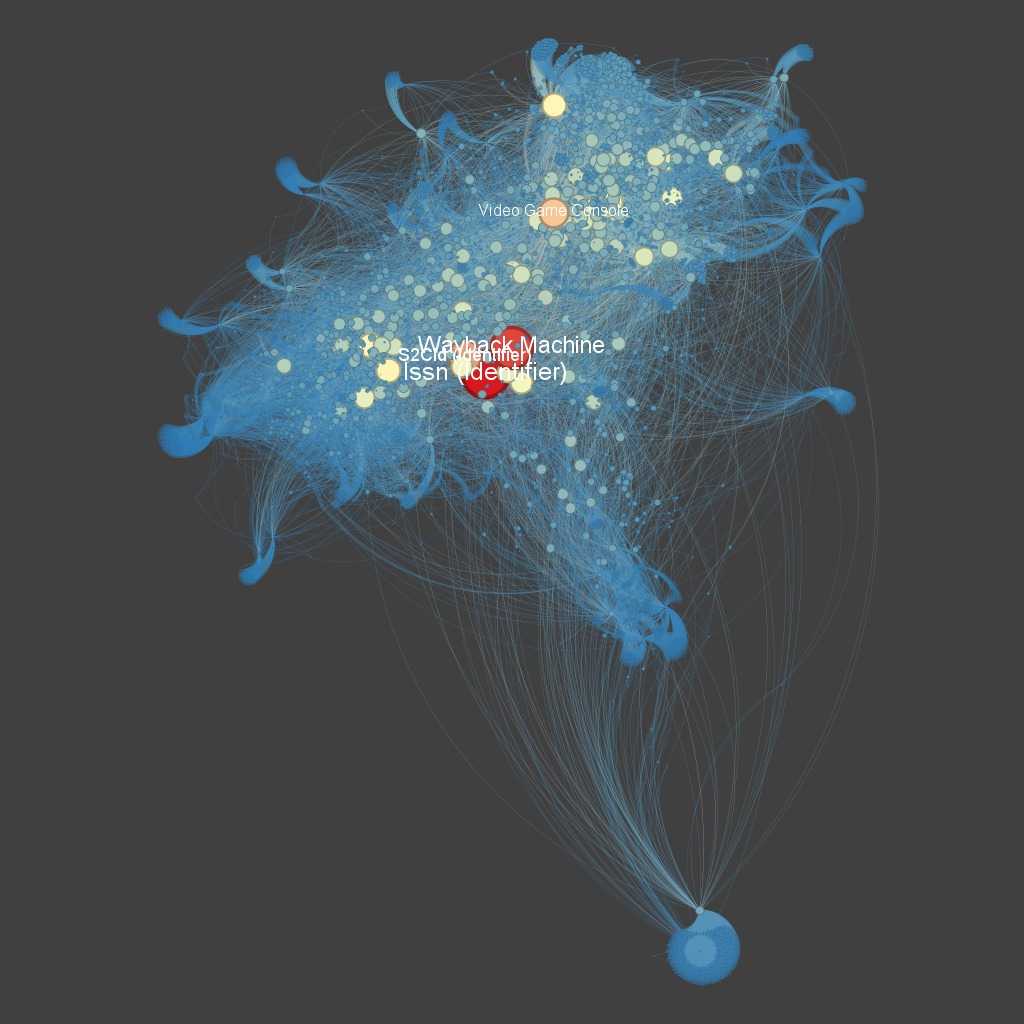

# Requisito 03

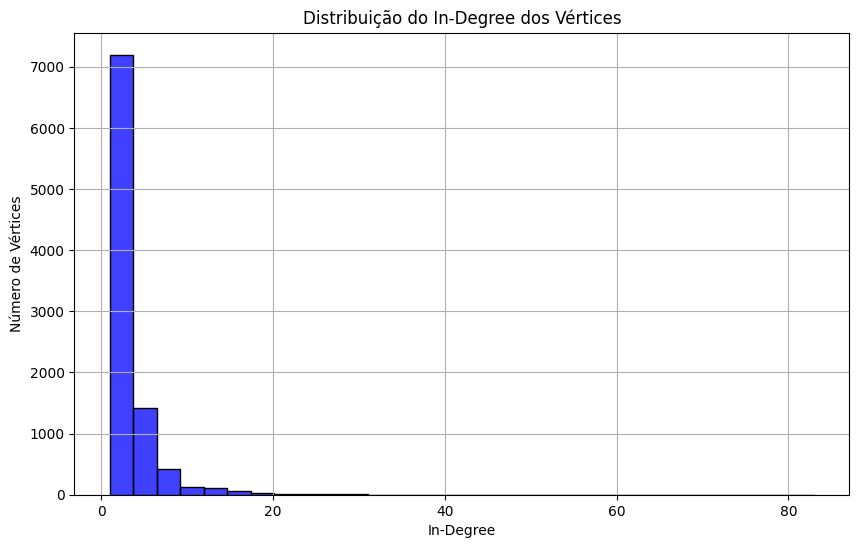

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
dados = pd.read_csv('/content/drive/MyDrive/Estrutura de Dados II/week 08-09/rede.csv')

# Selecionar a coluna de In-Degree
in_degree = dados['indegree']

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o histograma da distribuição de In-Degree
sns.histplot(data=in_degree, kde=False, bins=30, color='blue')

# Definições para exibir o gráfico
plt.title('Distribuição do In-Degree dos Vértices')
plt.xlabel('In-Degree')
plt.ylabel('Número de Vértices')
plt.grid(True)
plt.show()

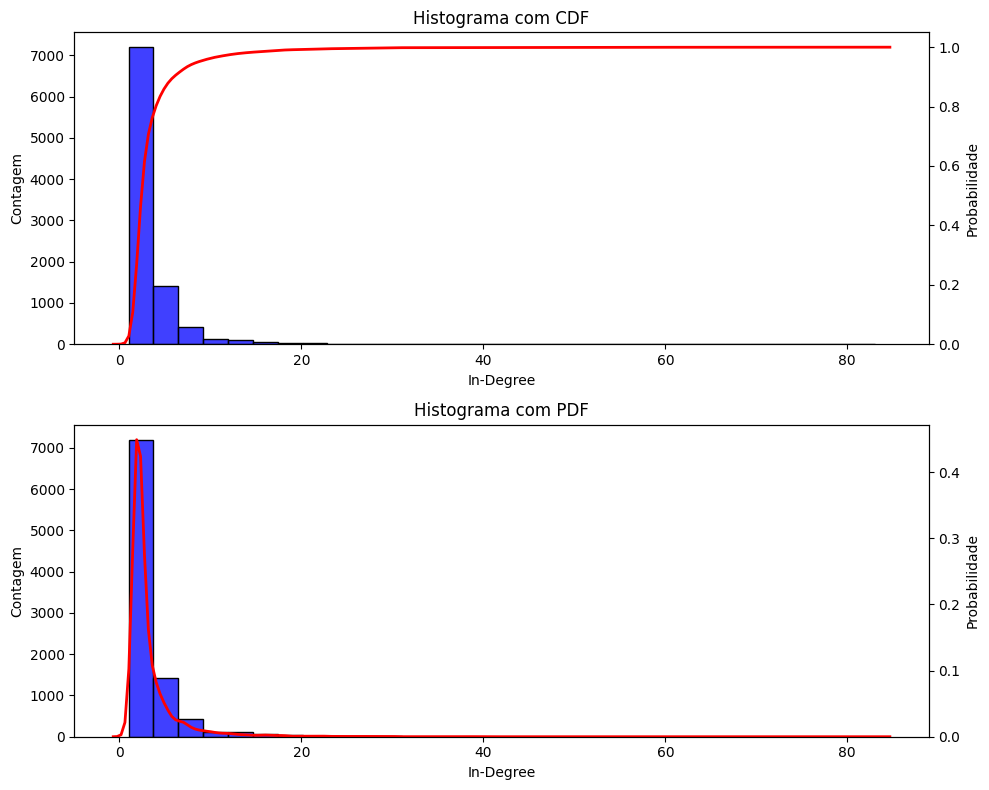

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o histograma e a CDF
plt.subplot(2, 1, 1)
sns.histplot(in_degree, bins=30, kde=False, stat='count', color='blue', label='Histograma')
plt.xlabel('In-Degree')
plt.ylabel('Contagem')
plt.title('Histograma com CDF')

# Adicionar a linha da CDF
eixo1 = plt.gca()  # Obter o eixo atual
eixo2 = eixo1.twinx()  # Criar um segundo eixo y compartilhado com o eixo x
sns.kdeplot(in_degree, cumulative=True, color='red', lw=2, ax=eixo2, label='CDF')
eixo2.set_ylabel('Probabilidade')

# Criar o histograma e a PDF (Função de Densidade de Probabilidade)
plt.subplot(2, 1, 2)
sns.histplot(in_degree, bins=30, kde=False, stat='count', color='blue', label='Histograma')
plt.xlabel('In-Degree')
plt.ylabel('Contagem')
plt.title('Histograma com PDF')

# Adicionar a linha da PDF
eixo3 = plt.gca()  # Obter o eixo atual
eixo4 = eixo3.twinx()  # Criar um segundo eixo y compartilhado com o eixo x
sns.kdeplot(in_degree, cumulative=False, color='red', lw=2, ax=eixo4, label='PDF')
eixo4.set_ylabel('Probabilidade')

# Ajustar o layout e mostrar a figura
plt.tight_layout()
plt.show()


# Requisito 04

In [15]:
import networkx as nx
import csv

# Calcular o k-core e k-shell (que aqui são equivalentes)
k_core = nx.core_number(G_combined)
k_shell = k_core.copy()  # Copiando diretamente, pois k-core e k-shell são tratados da mesma forma

# Função para exportar dados para CSV
def exportar_para_csv(dados, nome_arquivo, colunas):
    with open(nome_arquivo, 'w', newline='') as csvfile:
        escritor = csv.DictWriter(csvfile, fieldnames=colunas)
        escritor.writeheader()
        for no, valor in dados.items():
            escritor.writerow({'Id': no, colunas[1]: valor})

# Exportar k-core para CSV
exportar_para_csv(k_core, 'k_core.csv', ['Id', 'K-Core'])

# Exportar k-shell para CSV
exportar_para_csv(k_shell, 'k_shell.csv', ['Id', 'K-Shell'])

### K-core

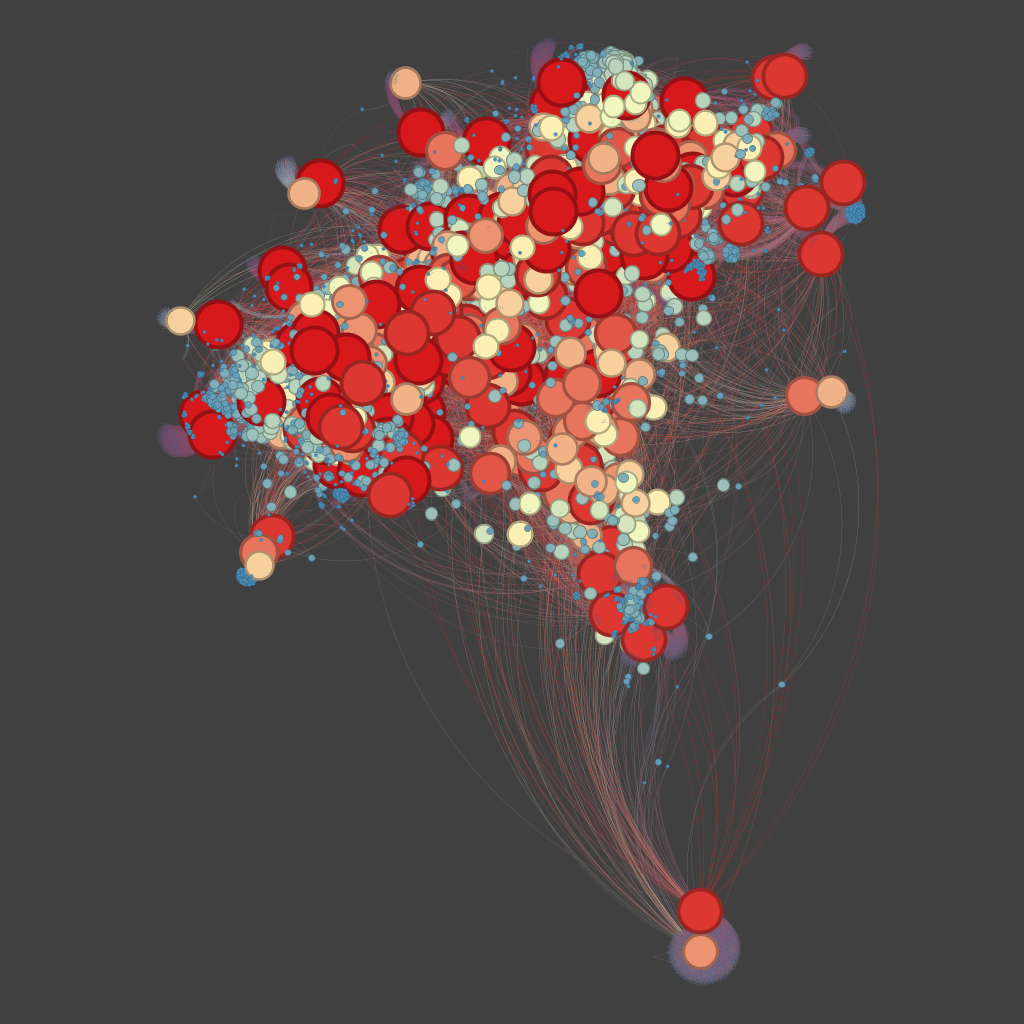

### K-shell

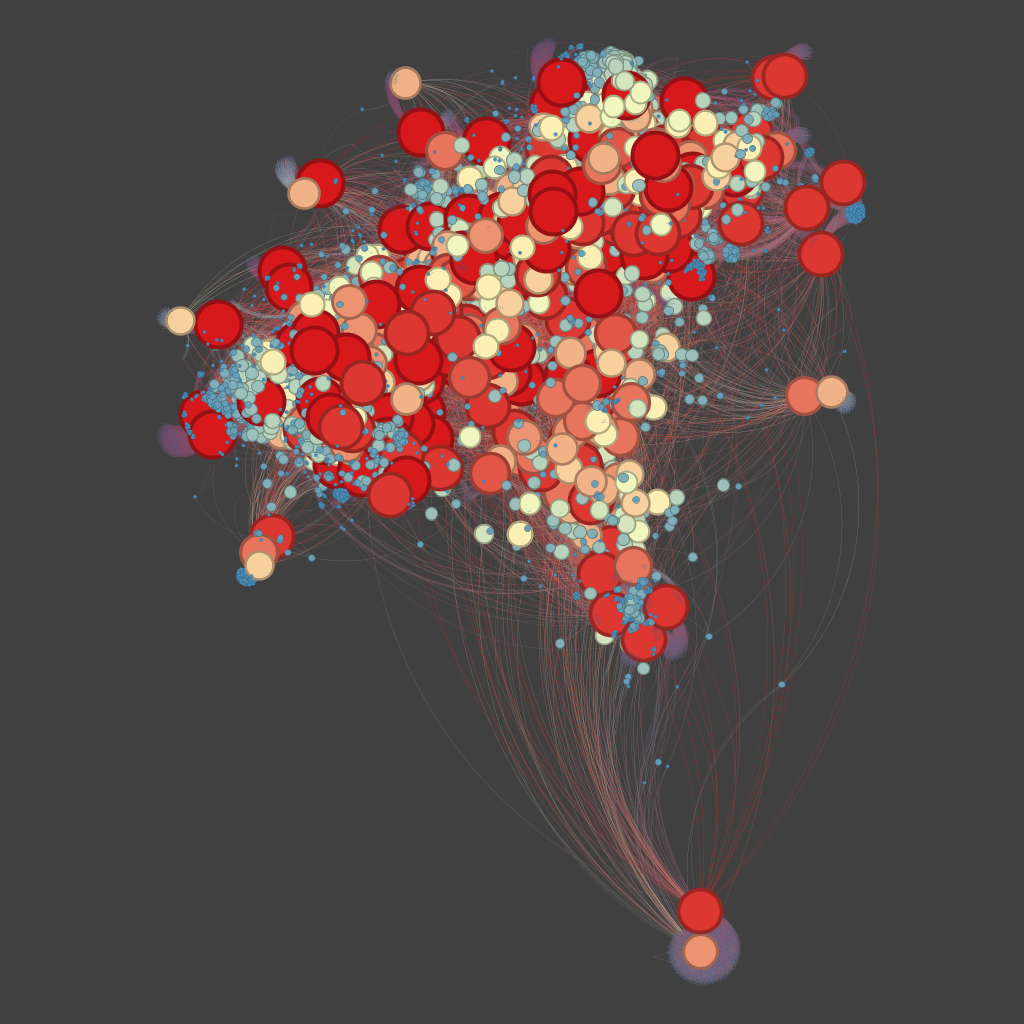